## Displaying and Saving Altair Visualizations

In [13]:
from altair import Chart, load_dataset

data = load_dataset('cars', url_only=True)

In [27]:
cars = load_dataset('cars')

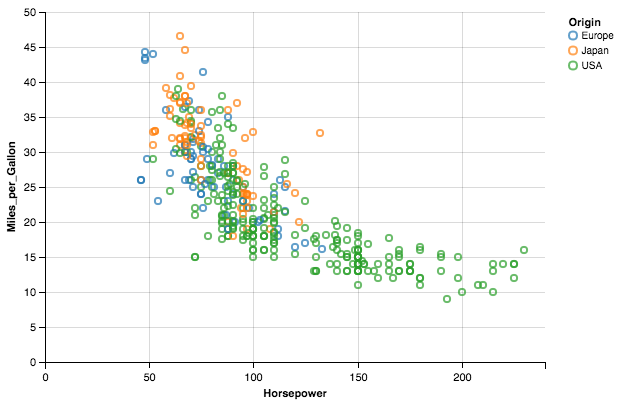

In [14]:
Chart(data).mark_point().encode(
             x='Horsepower:Q',
             y='Miles_per_Gallon:Q',
             color='Origin:N',
        )

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

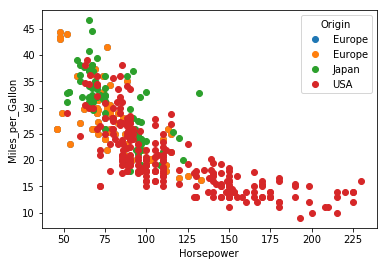

In [31]:
def scatter(group):
    plt.plot(group['Horsepower'], group['Miles_per_Gallon'], 'o', label=group.name)

cars.groupby('Origin').apply(scatter)
plt.legend(title = 'Origin')
plt.xlabel('Horsepower')
plt.ylabel('Miles_per_Gallon')

## Getting started with altair

### Getting data

In [15]:
## getting data

import pandas as pd
data = pd.DataFrame({'a': list('AADDDDEEE'),
                     'b': [3, 6, 4, 5, 2, 1, 8, 4, 7]})

### Chart Object

In [19]:
## creating the chart object

from altair import Chart
chart = Chart(data)

So far, we have defined the Chart object, but we have not yet told the chart to do anything with the data. That will come next.

### Encoding and markings

In [22]:
chart.mark_point()

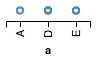

In [24]:
chart.mark_point().encode(
    x='a',
)

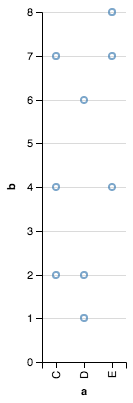

In [14]:
Chart(data).mark_point().encode(
    x='a',
    y='b',
)

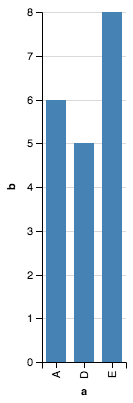

In [34]:
Chart(data).mark_bar().encode(
    x='a',
    y='b',
)

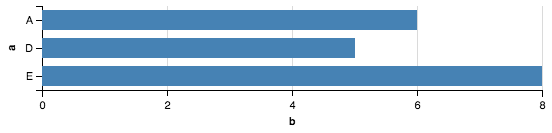

In [35]:
Chart(data).mark_bar().encode(
    y='a',
    x='b',
)

### Data Transformation: Aggregation

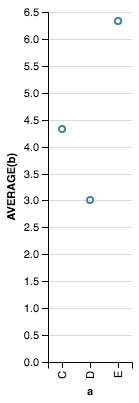

In [15]:
Chart(data).mark_point().encode(
    x='a',
    y='average(b)',
)

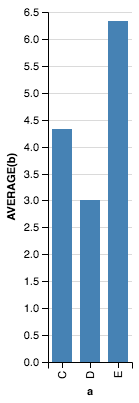

In [16]:
Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)

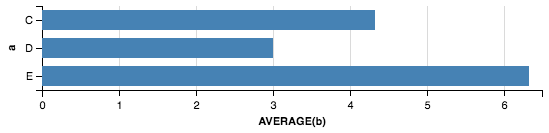

In [17]:
Chart(data).mark_bar().encode(
    y='a',
    x='average(b)',
)

In [21]:
chart = Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)

print(chart.to_json(data=False, indent=2))

{
  "encoding": {
    "x": {
      "field": "a",
      "type": "nominal"
    },
    "y": {
      "aggregate": "average",
      "field": "b",
      "type": "quantitative"
    }
  },
  "mark": "bar"
}


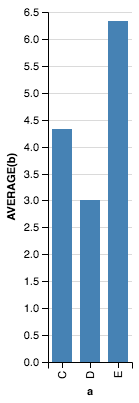

In [23]:
from altair import X, Y

Chart(data).mark_bar().encode(
    X('a', type='nominal'),
    Y('b', type='quantitative', aggregate='average')
)

### Customizing your Visualization

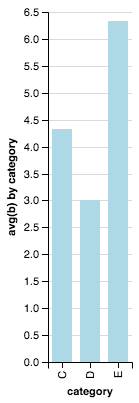

In [31]:
from altair import Axis

Chart(data).mark_bar(color='lightblue').encode(
    X('a', axis=Axis(title='category')),
    Y('average(b)', axis=Axis(title='avg(b) by category'))
)

### Publishing your Visualization

In [32]:
chart = Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)
html = chart.to_html()

## Exploring Data: Seattle Weather

In [38]:
from altair import load_dataset
df = load_dataset('seattle-weather')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012/01/01,0.0,12.8,5.0,4.7,drizzle
1,2012/01/02,10.9,10.6,2.8,4.5,rain
2,2012/01/03,0.8,11.7,7.2,2.3,rain
3,2012/01/04,20.3,12.2,5.6,4.7,rain
4,2012/01/05,1.3,8.9,2.8,6.1,rain


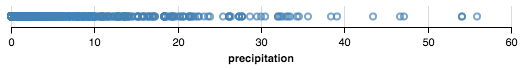

In [39]:
from altair import Chart
Chart(df).mark_point().encode(
        x='precipitation',
)

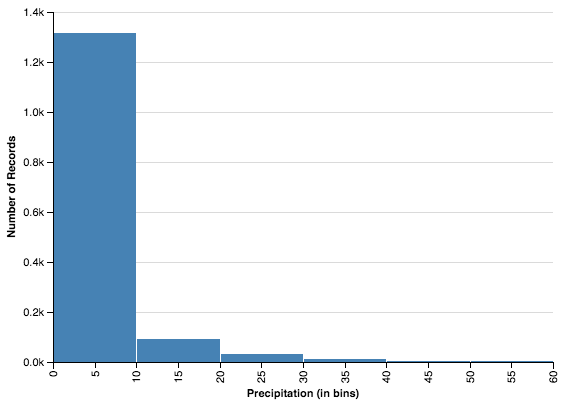

In [40]:
from altair import X,Y,Axis
Chart(df).mark_bar().encode(
        X('precipitation',bin=True, axis= Axis(title='Precipitation (in bins)')),
        Y('count(*):Q'),
)

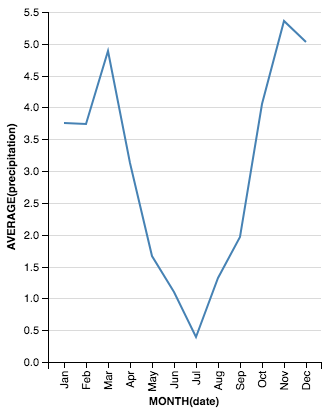

In [41]:
Chart(df).mark_line().encode(
    X('date:T', timeUnit='month'),
    Y('average(precipitation)')
)

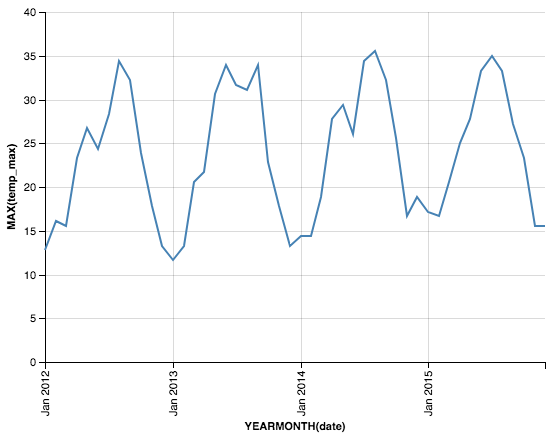

In [42]:
Chart(df).mark_line().encode(
    X('date:T', timeUnit='yearmonth'),
    Y('max(temp_max)'),
)

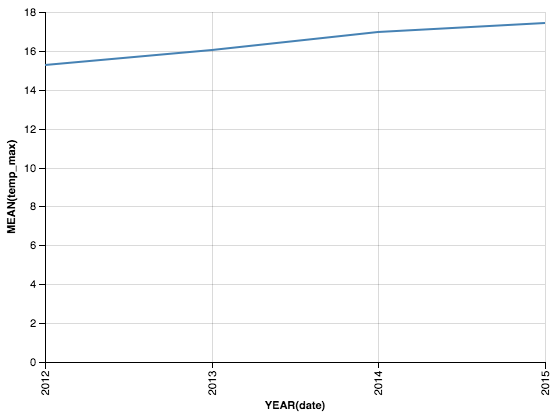

In [43]:
Chart(df).mark_line().encode(
    X('date:T', timeUnit='year'),
    Y('mean(temp_max)'),
)

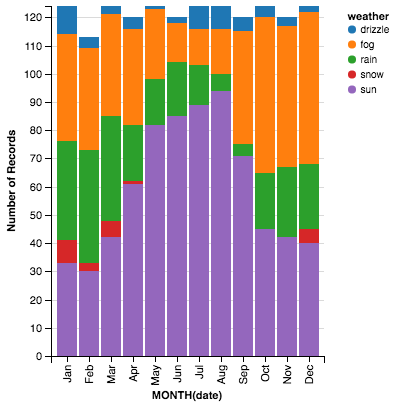

In [44]:
Chart(df).mark_bar().encode(
    x=X('date:T', timeUnit='month'),
    y='count(*)',
    color='weather',
)

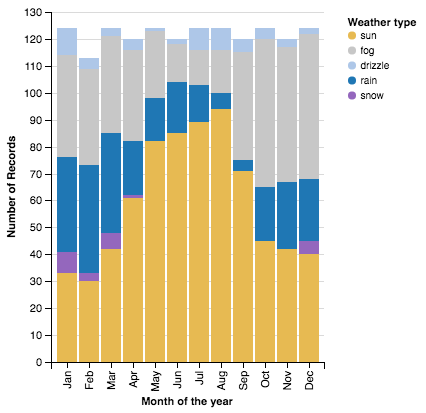

In [45]:
from altair import Scale

scale = Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
              range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])

from altair import Axis, Color, Legend

Chart(df).mark_bar().encode(
    x=X('date:T', timeUnit='month', axis=Axis(title='Month of the year')),
    y='count(*):Q',
    color=Color('weather',legend=Legend(title='Weather type'), scale=scale),
)

### Altair datasets

In [15]:
from altair.datasets import list_datasets

len(list_datasets())

40

In [16]:
list_datasets()[:5]

['airports', 'anscombe', 'barley', 'birdstrikes', 'budget']

In [17]:
from altair import load_dataset

movies = load_dataset('movies')

In [18]:
movies.columns

Index(['Creative_Type', 'Director', 'Distributor', 'IMDB_Rating', 'IMDB_Votes',
       'MPAA_Rating', 'Major_Genre', 'Production_Budget', 'Release_Date',
       'Rotten_Tomatoes_Rating', 'Running_Time_min', 'Source', 'Title',
       'US_DVD_Sales', 'US_Gross', 'Worldwide_Gross'],
      dtype='object')